## CMPINF 2100 Week 08
### KMeans with 2 variables
## Import Modules

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
df = pd.read_csv("cluster2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x1          300 non-null    float64
 1   x2          300 non-null    float64
 2   true_group  300 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [5]:
df.dtypes

x1            float64
x2            float64
true_group     object
dtype: object

In [6]:
df.isna().sum()

x1            0
x2            0
true_group    0
dtype: int64

In [7]:
df.nunique()

x1            300
x2            300
true_group      5
dtype: int64

In [8]:
df.true_group.value_counts()

true_group
A    60
E    60
D    60
B    60
C    60
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


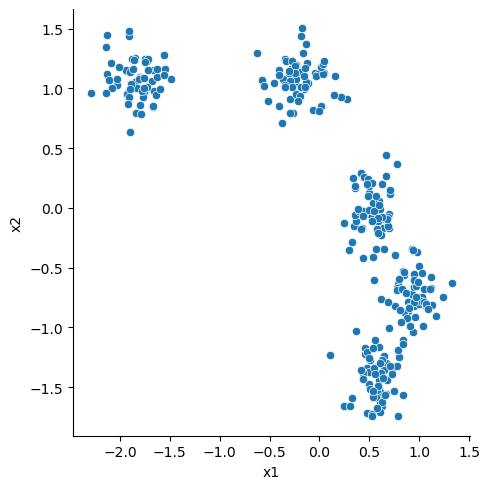

In [12]:
sns.relplot(data=df, x="x1", y="x2")

plt.show()

Color by true known groups!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


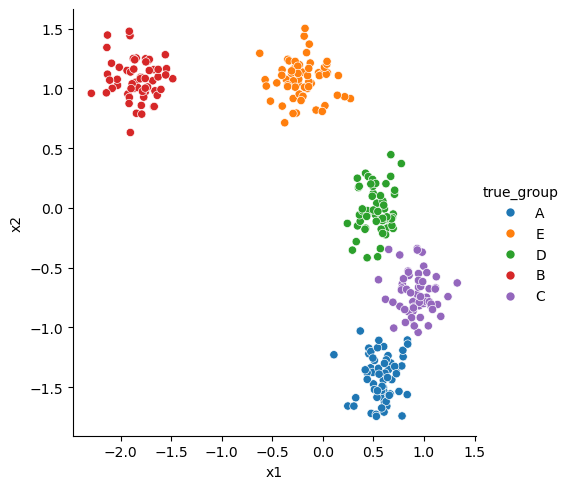

In [14]:
sns.relplot(data=df, x="x1", y="x2", hue="true_group")

plt.show()

## KMeans

Lets prepare the data as required by scikit-learn.

In [15]:
X = df.select_dtypes("number").copy()

In [16]:
X.shape

(300, 2)

In [17]:
X

,x1,x2
0,0.599305,-1.503822
1,-0.042585,1.131445
2,0.608824,-1.621903
3,0.672246,-1.297179
4,-0.518185,0.893530
...,...,...
295,0.834403,-1.561673
296,-1.896159,0.999026
297,-2.107722,1.069166
298,0.041597,1.226313


In [18]:
from sklearn.cluster import KMeans

INITIALIZE, FIT, and PREDICT!!!

But lets do all actions in a single line of code!!

We know there are 5 groupings, so let's use 5 clusters!

In [19]:
clusters_5 = KMeans(n_clusters=5, random_state=121, n_init=25, max_iter=500).fit_predict(X)

Now assign the CLUSTERS LABELS to a copied DataFrame!

In [21]:
df_copy = df.copy()

In [23]:
df_copy["k5"] = pd.Series(clusters_5, index=df_copy.index).astype("category")

Lets visualize the cluster results on a scatter plot!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


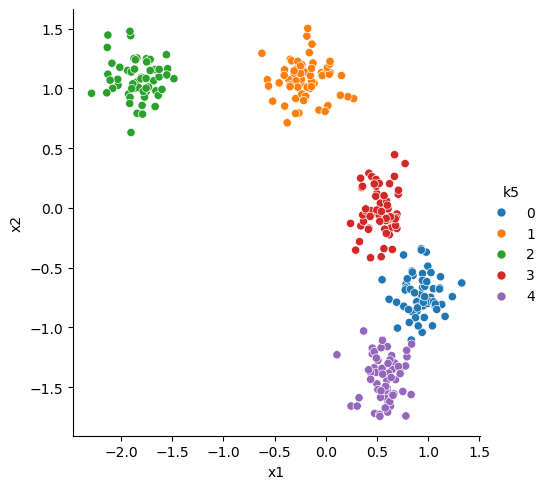

In [24]:
sns.relplot(data=df_copy, x="x1", y="x2", hue="k5")

plt.show()

Lets use a HEATMAP to COMPARE the cluster labels with the KNOWN true groupings!!

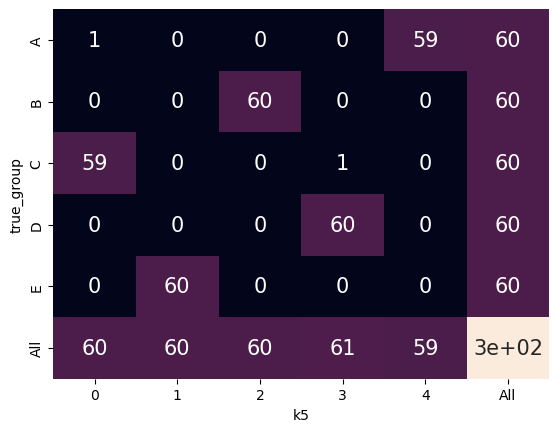

In [29]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(df_copy.true_group, df_copy.k5, margins=True),
            annot=True,
            annot_kws={"fontsize":15}, cbar=False,
            ax=ax)

plt.show()

Lets use the MARKER SHAPE via teh style argument in sns.relplot to see which specific datapoints are mislabeled.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


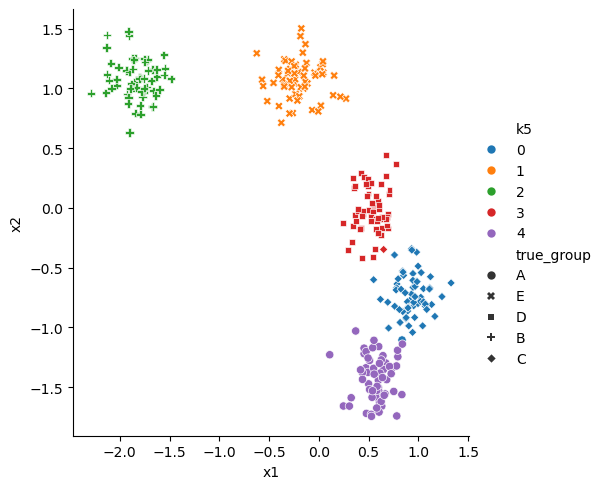

In [30]:
sns.relplot(data=df_copy, x="x1", y="x2", hue="k5", style="true_group")

plt. show()

KMeans has no knowledge of the groupings!! Its clustering ONLY based on the numeric cols!!!

## What if we did NOT know the number of clusters to try?

I always recommend starting out with 2 clusters!! You should do this just to see what happens!!

In [31]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(X)

In [32]:
df_copy["k2"] = pd.Series(clusters_2, index=df_copy.index).astype("category")

In [33]:
df_copy

,x1,x2,true_group,k5,k2
0,0.599305,-1.503822,A,4,0
1,-0.042585,1.131445,E,1,1
2,0.608824,-1.621903,A,4,0
3,0.672246,-1.297179,A,4,0
4,-0.518185,0.893530,E,1,1
...,...,...,...,...,...
295,0.834403,-1.561673,A,4,0
296,-1.896159,0.999026,B,2,1
297,-2.107722,1.069166,B,2,1
298,0.041597,1.226313,E,1,1


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


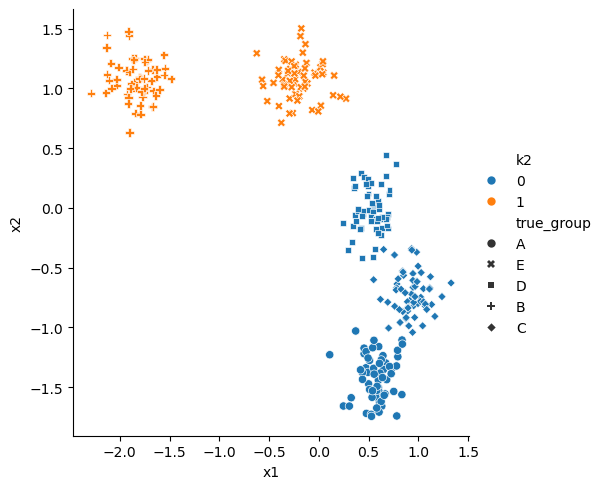

In [34]:
sns.relplot(data=df_copy, x="x1", y="x2", hue="k2", style="true_group")

plt.show()

## Optimal cluster numbers!

You do not need to manually try out many diff number of clusters.

Try 2 clusters. Then try one more representative number based on your exploration OR based on some known grouping.

Then use the knee-bend plot to figure out the better number of clusters.

In [36]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit(X)

    tots_within.append(km.inertia_)

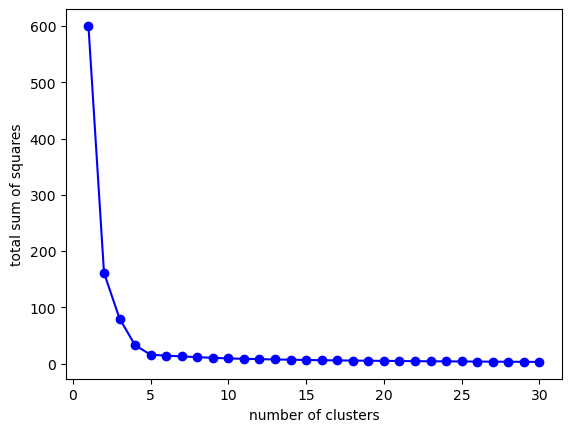

In [37]:
fig, ax = plt.subplots()

ax.plot(K, tots_within, "bo-")
ax.set_xlabel("number of clusters")
ax.set_ylabel("total sum of squares")

plt.show()